K Means Algorithm:
    
    
K-means is a popular clustering algorithm used to partition a dataset into K distinct clusters.
It is unsupervised algorithm.
It is an iterative algorithm that aims to minimize the sum of squared distances between the data points and their cluster centroids.

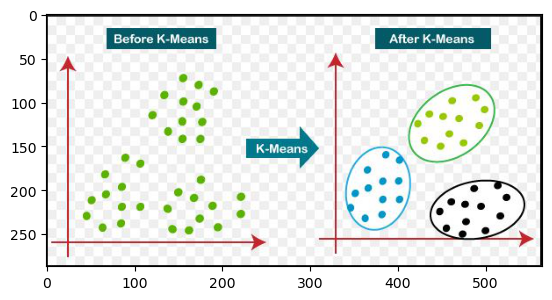

In [80]:
a=plt.imread("download.jpeg")
plt.imshow(X=a)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [47]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
def informations_about_dataset():
    print('\033[1m' + '############ NA ############' + '\033[0m')
    print(df.describe().T)
    print('\033[1m' + '############ NA ############' + '\033[0m')
    print(df.info())
    print('\033[1m' + '############ NA ############' + '\033[0m')
    print(df.dtypes)
    print('\033[1m' + '############ NA ############' + '\033[0m')
    print(df.tail(10))
    print('\033[1m' + '############ NA ############' + '\033[0m')
    print(df.isnull().any())
informations_about_dataset()

############ NA ############
                        count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0  
############ NA ############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Incom

In [49]:
df=df.rename(columns={"Annual Income (k$)":"Annual Income",
              "Spending Score (1-100)":"Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


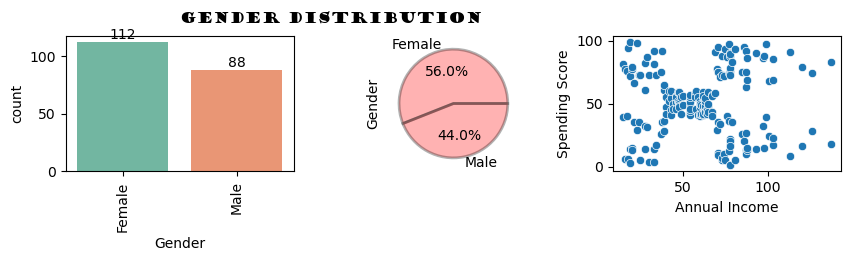

In [50]:
#visualization
plt.style.use=('dark_background')
plt.figure(figsize=(10,6))
plt.subplot(3,3,1)
ax=sns.countplot(x="Gender",data=df,palette="Set2",order=df["Gender"].value_counts().index)
ax.bar_label(ax.containers[0],rotation=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title(label="Gender Distribution",pad=10,fontdict=
             {'fontsize': 10,
        'fontweight': 10,
        'color': "Black",
        'verticalalignment': 'baseline',
        'horizontalalignment':'left',
            "font":"Goudy Stout"})


plt.subplot(3,3,2)
explode=[0,0]
df['Gender'].value_counts().plot(kind='pie',
 colors="r", legend=None, explode=explode,
counterclock=True, startangle=0, 
wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')
plt.subplot(3,3,3)
ax=sns.scatterplot(x=df["Annual Income"],y="Spending Score",data=df)
plt.show()



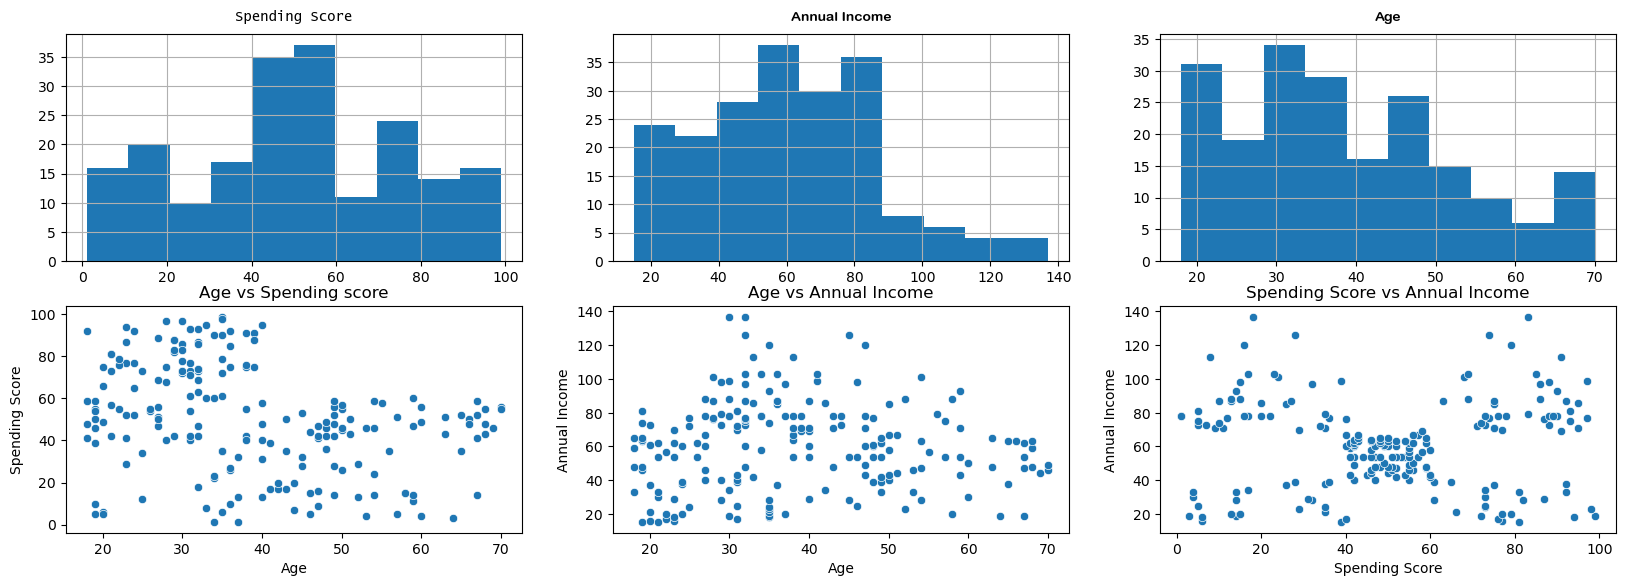

In [51]:
def visualization():
    plt.figure(figsize=(20,10))
    plt.subplot(3,3,1)
    ax=df["Spending Score"].hist(yrot=0,ylabelsize=10
                              ,xrot=0,xlabelsize=10
                              ,grid=True,legend=False,bins=10)
    ax.set_title(label="Spending Score",pad=10,fontdict=
             {'fontsize': 10,
        'fontweight': 10,
        'color': "Black",
        'verticalalignment': 'baseline',
        'horizontalalignment':'center',
            "font":"Lucida Console"})
    
    


    plt.subplot(3,3,2)
    ax=df["Annual Income"].hist(yrot=0,ylabelsize=10
                              ,xrot=0,xlabelsize=10
                              ,grid=True,legend=False,bins=10)
    ax.set_title(label="Annual Income",pad=10,fontdict=
             {'fontsize': 10,
        'fontweight': 10,
        'color': "Black",
        'verticalalignment': 'baseline',
        'horizontalalignment':'center',
            "font":"Arial Rounded MT Bold"})
    
    
    
    plt.subplot(3,3,3)
    ax=df["Age"].hist(yrot=0,ylabelsize=10
                              ,xrot=0,xlabelsize=10
                              ,grid=True,legend=False,bins=10)
    ax.set_title(label="Age",pad=10,fontdict=
             {'fontsize': 10,
        'fontweight': 10,
        'color': "Black",
        'verticalalignment': 'baseline',
        'horizontalalignment':'center',
            "font":"Arial Rounded MT Bold"})
    
    plt.subplot(3,3,4)
    ax=sns.scatterplot(x="Age",y="Spending Score",data=df,
                       legend ="brief",markers=True,palette="Set3")
    ax.set_title("Age vs Spending score")
    
    
    plt.subplot(3,3,5)
    ax=sns.scatterplot(x="Age",y="Annual Income",data=df,
                       legend ="brief",markers=True,palette="Set1")
    ax.set_title("Age vs Annual Income")
    
    
    plt.subplot(3,3,6)
    ax=sns.scatterplot(x="Spending Score",y="Annual Income",data=df,
                       legend ="brief",markers=True,palette="Set2")
    ax.set_title("Spending Score vs Annual Income")
    
    
    plt.show()
  


visualization()

In [52]:
x=df[[ 'Annual Income', 'Spending Score']]
x.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


In [54]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [55]:
#finding the number of clusters

wscc=[]
for cluster in range(1,11):
    kmm=KMeans(n_clusters=cluster,n_init='warn',init='k-means++',max_iter=1000,random_state=42)
    kmm.fit(x)
    wscc.append(kmm.inertia_)
    
wscc

[23.040720326039903,
 13.993505283127977,
 9.058985215159455,
 6.110312266413656,
 3.583117905952561,
 3.0983851418825865,
 2.624103948396721,
 2.2180573120830718,
 1.873434667867071,
 1.6557947221391274]

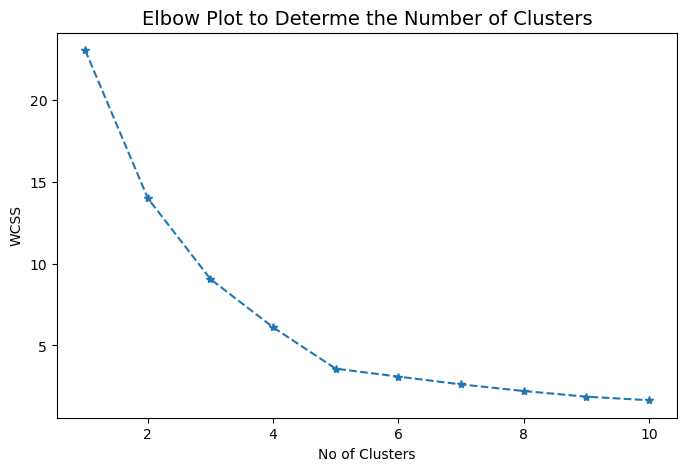

In [83]:
plt.figure(figsize=(8,5))

plt.plot(range(1,11),wscc, '*--')
plt.title('Elbow Plot to Determe the Number of Clusters', fontsize=14)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

In [68]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wscc, curve="convex", direction="decreasing")
print('The Knee located at figure:', kl.elbow)

The Knee located at figure: 5


In [57]:
#n=5

In [58]:
clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(x)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [72]:
## Applying the Silhouette method to determine the number of clusters

silhouette_coef = []

for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coef.append(score)

silhouette_coef

[0.33340205479521,
 0.4514909309424474,
 0.49620078745146784,
 0.5594854531227246,
 0.5371600756273063,
 0.5187916611768829,
 0.4322805234768182,
 0.44293867395812975,
 0.4454607997122972]

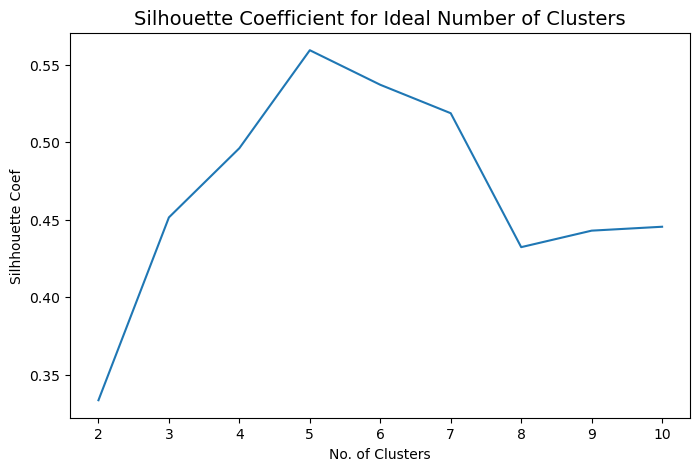

In [73]:
plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_coef)
plt.xticks(range(2,11))
plt.title('Silhouette Coefficient for Ideal Number of Clusters', fontsize=14)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhhouette Coef')
plt.show()

In [59]:
df_Kmeans = df.copy()            ## making a copy of original dataframe
df_Kmeans['Cluster'] = y_kmeans  ## appending the cluster column
print(df_Kmeans.head(5))

   CustomerID  Gender  Age  Annual Income  Spending Score  Cluster
0           1    Male   19             15              39        2
1           2    Male   21             15              81        3
2           3  Female   20             16               6        2
3           4  Female   23             16              77        3
4           5  Female   31             17              40        2


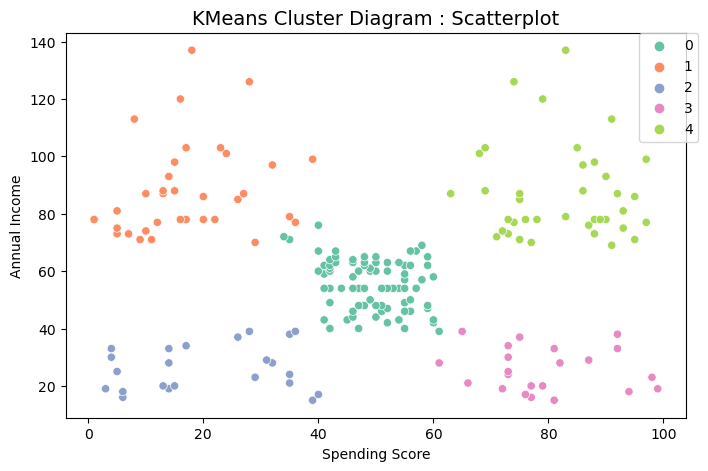

In [60]:
plt.figure(figsize=(8,5))
plt.title('KMeans Cluster Diagram : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Kmeans, x='Spending Score', y='Annual Income', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

(-0.5, 3839.5, 2159.5, -0.5)

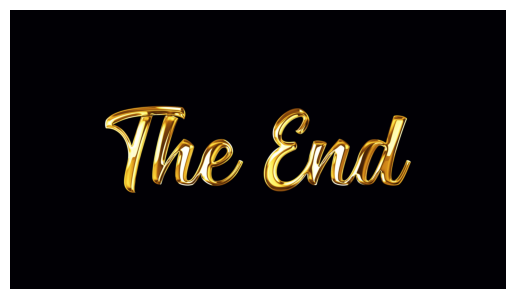

In [84]:
a=plt.imread("loop-light-glowing-effect-free-video.jpeg")
plt.imshow(a)
plt.axis('off')